In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import python.building_elec_model as bem

from python.utils import project_path, zone_names, tgw_path

In [2]:
home_types = bem.building_types_dict['resstock']
upgrades = [1, 4, 11, 14]

## ResStock model

### Train and predict future ResStock loads: state-wide

In [ ]:
# Read ResStock and temperature data
temp_file_path = f"{project_path}/data/climate/tgw/zonal_T2C_historical_1980_2019.csv"
df = bem.read_and_prepare_data(temp_file_path, 'resstock', home_types, upgrades)

Training 20 models with MLPRegressor...
Network architecture: (100, 100)
Regularization (alpha): 0.001
Max iterations: 500
------------------------------------------------------------

Progress: 1/20
Training model for upgrade 1, building_type mobile_home (8753 samples)
Model trained - R2: 0.892, RMSE: 43.24 MW, Iterations: 106


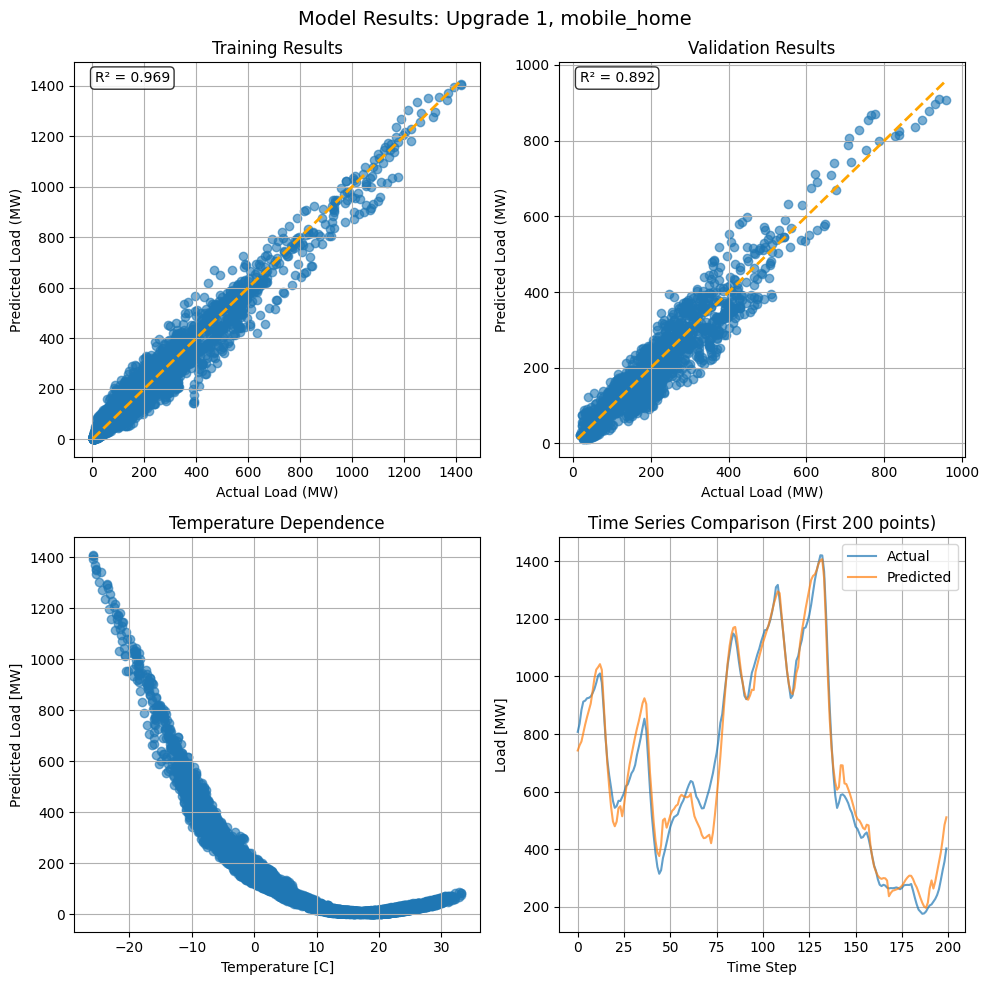


Progress: 2/20
Training model for upgrade 1, building_type single-family_detached (8753 samples)
Model trained - R2: 0.871, RMSE: 1707.46 MW, Iterations: 93


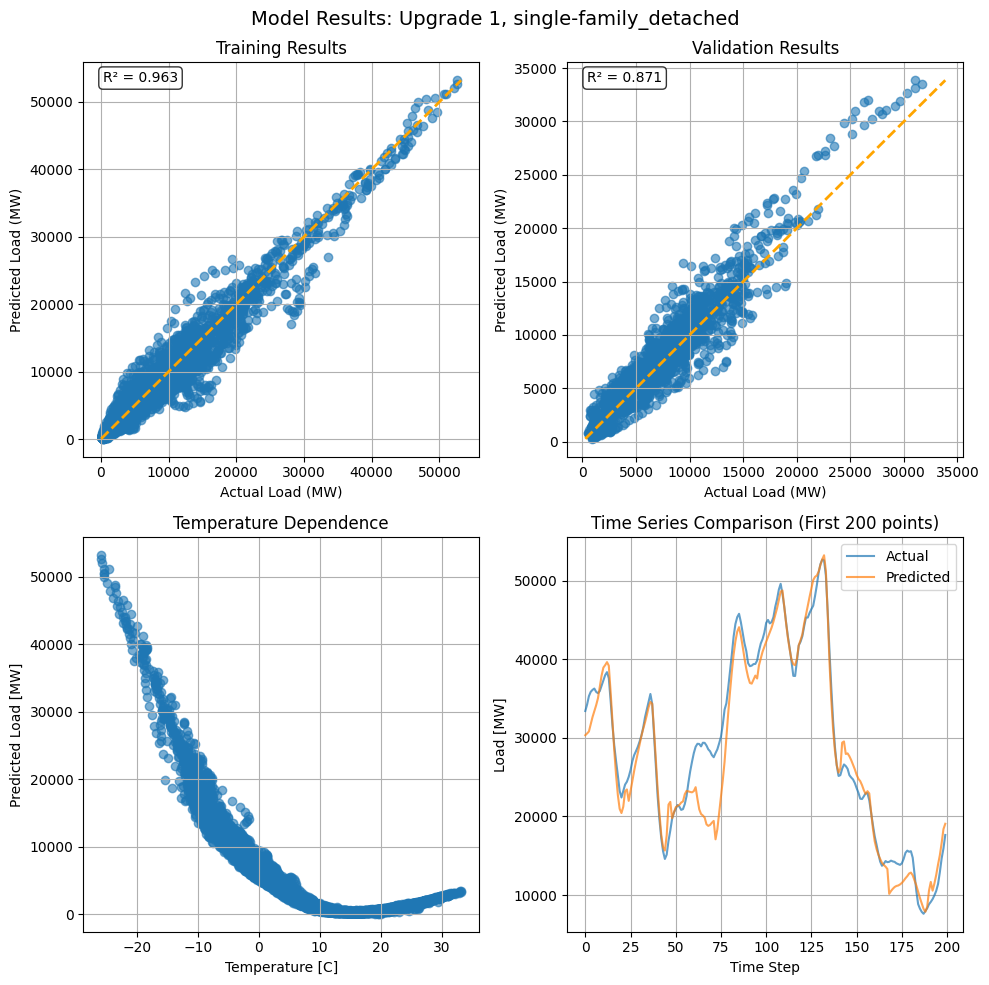


Progress: 3/20
Training model for upgrade 1, building_type single-family_attached (8753 samples)
Model trained - R2: 0.835, RMSE: 122.64 MW, Iterations: 90


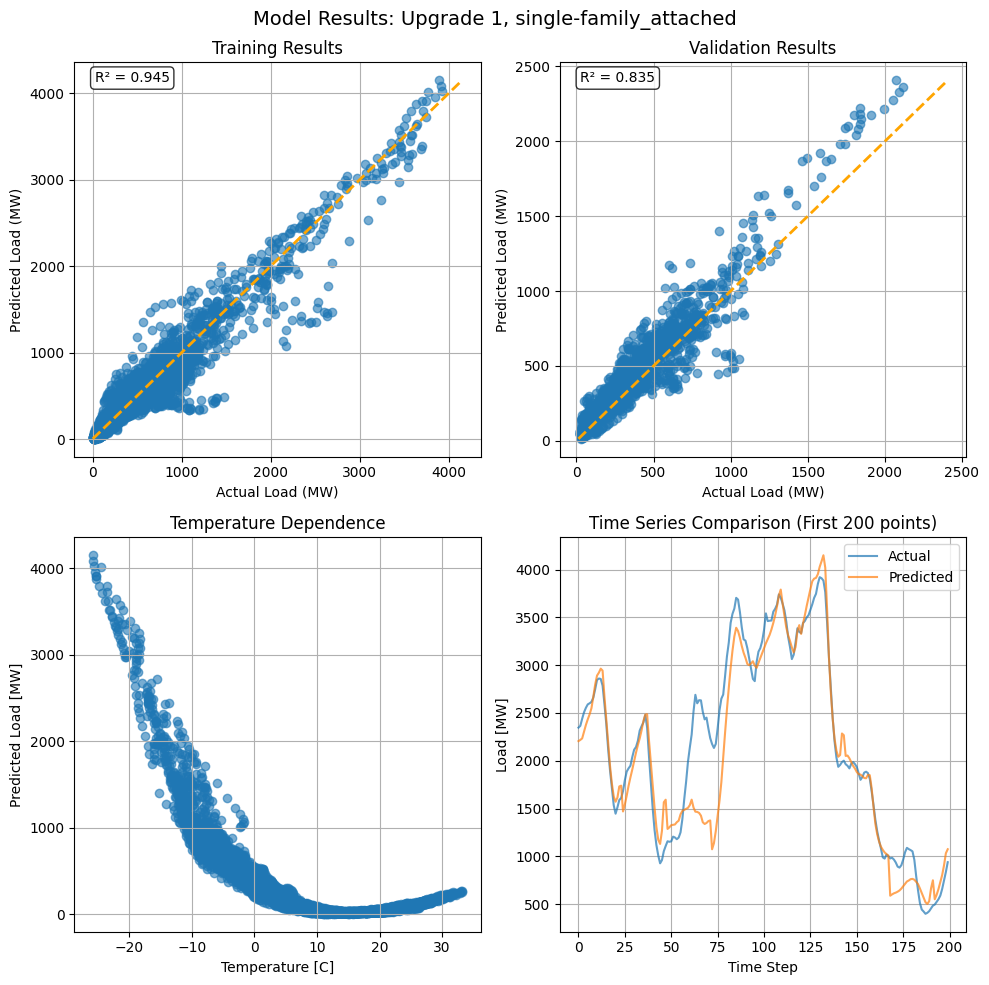


Progress: 4/20
Training model for upgrade 1, building_type multi-family_with_2_-_4_units (8753 samples)
Model trained - R2: 0.817, RMSE: 214.18 MW, Iterations: 90


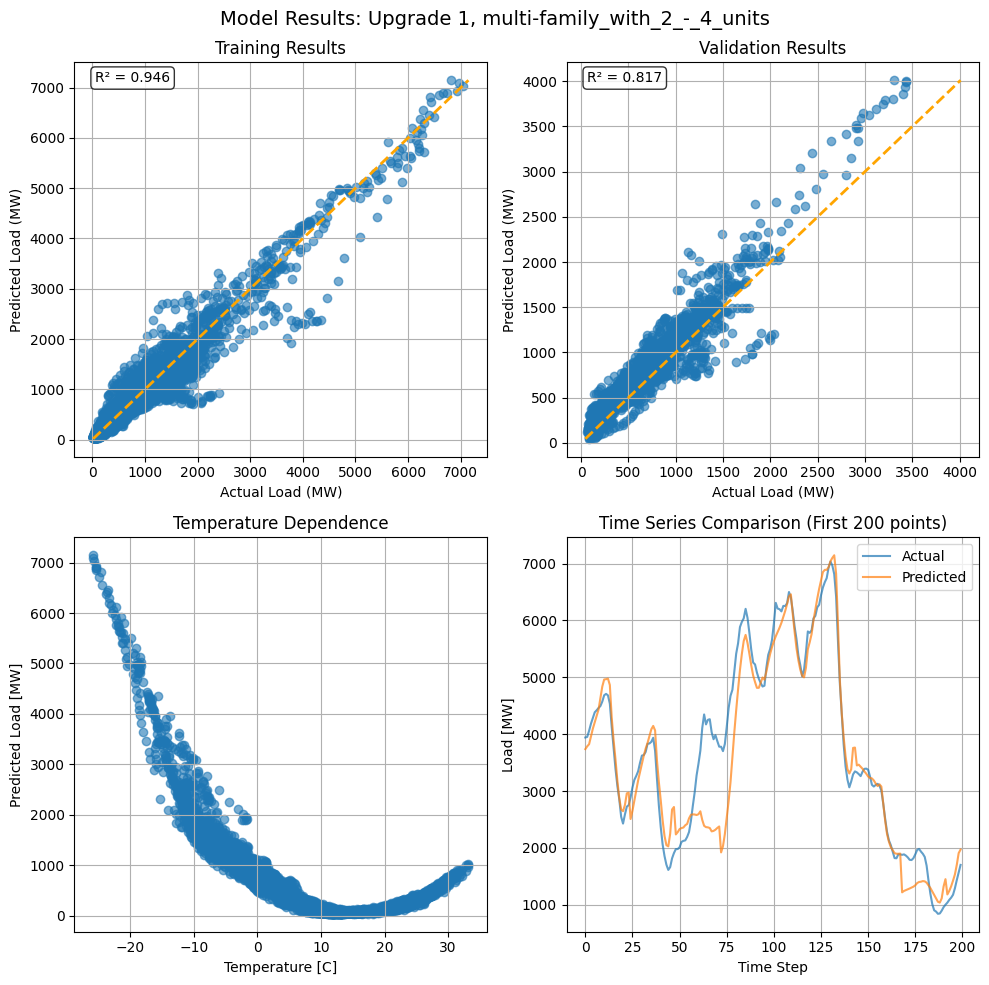


Progress: 5/20
Training model for upgrade 1, building_type multi-family_with_5plus_units (8753 samples)
Model trained - R2: 0.809, RMSE: 131.81 MW, Iterations: 195


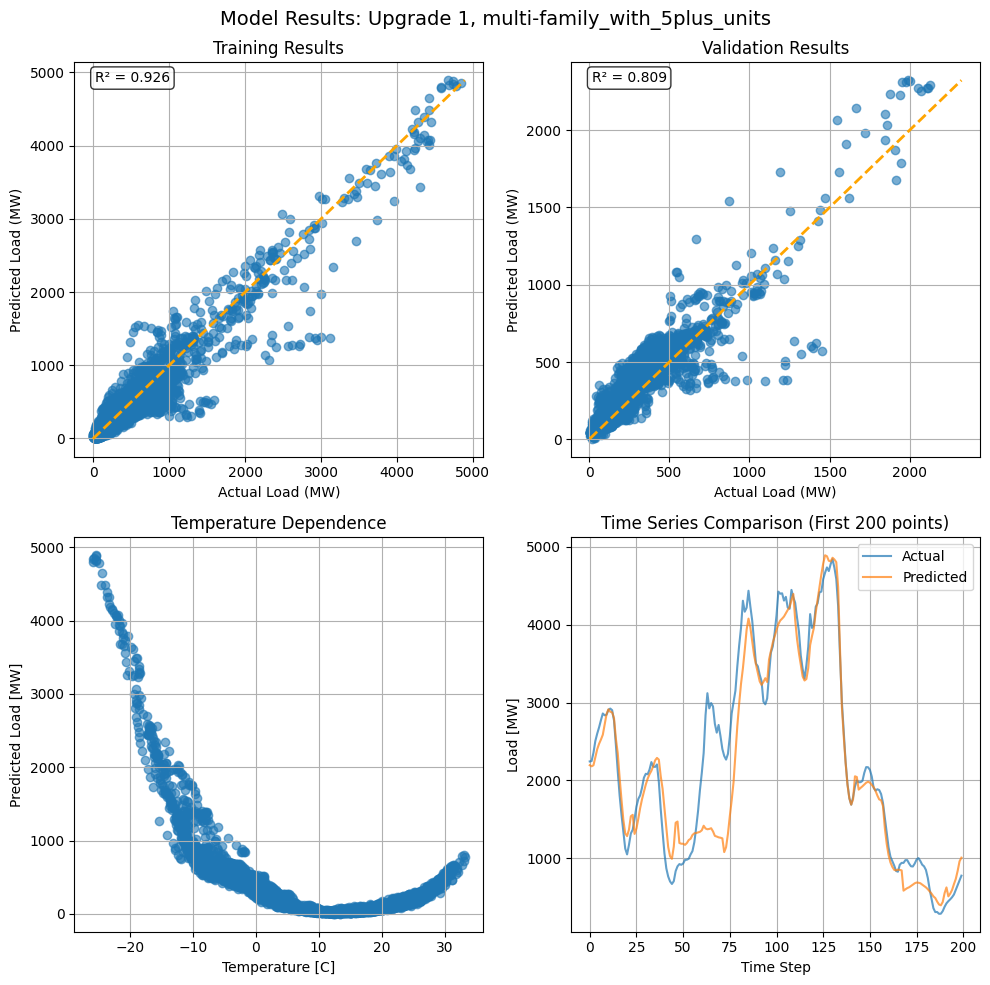


Progress: 6/20
Training model for upgrade 4, building_type mobile_home (8753 samples)
Model trained - R2: 0.817, RMSE: 15.45 MW, Iterations: 91


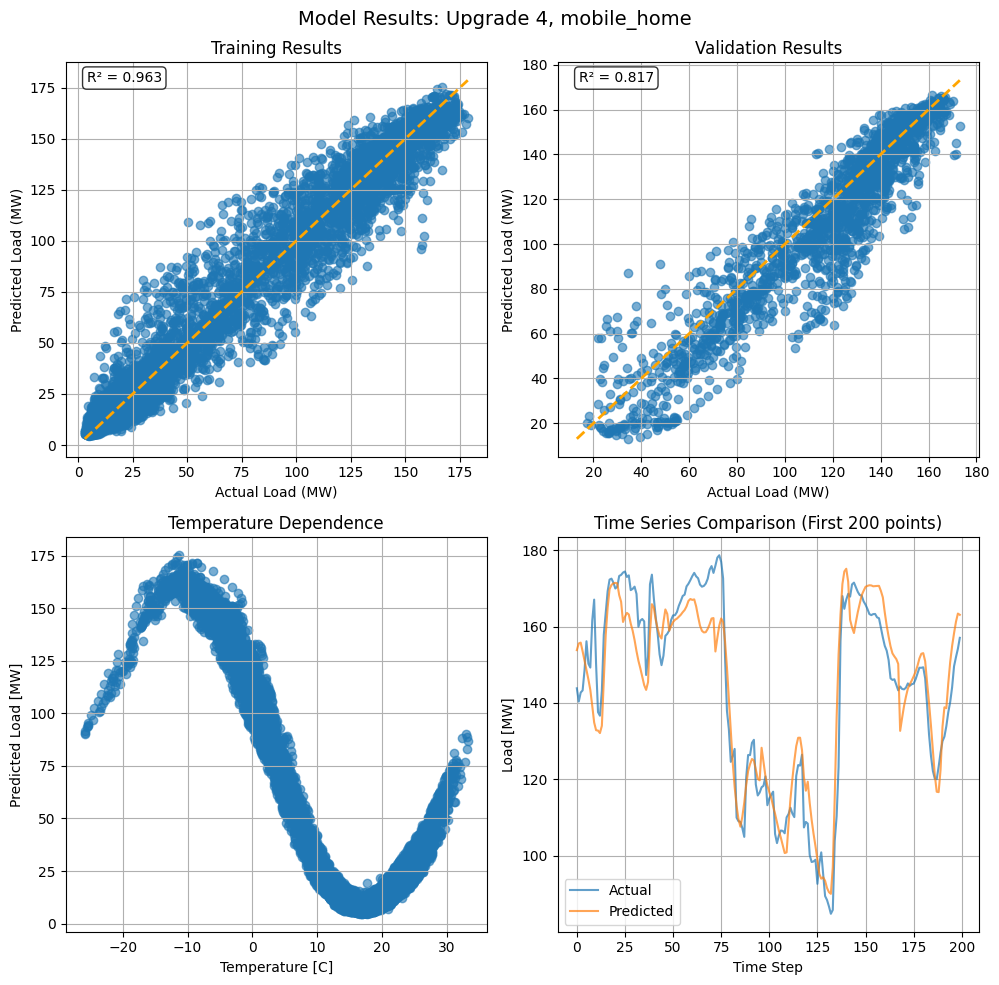


Progress: 7/20
Training model for upgrade 4, building_type single-family_detached (8753 samples)
Model trained - R2: 0.897, RMSE: 525.07 MW, Iterations: 64


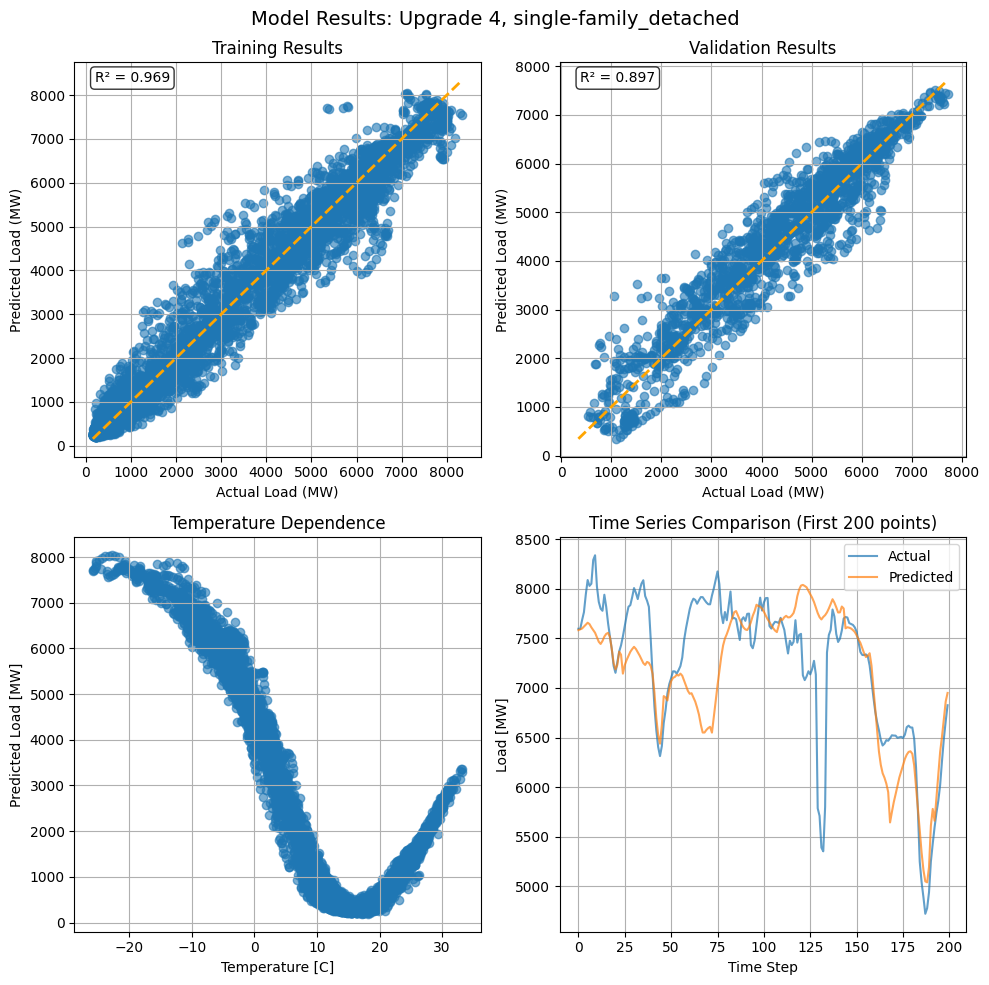


Progress: 8/20
Training model for upgrade 4, building_type single-family_attached (8753 samples)
Model trained - R2: 0.833, RMSE: 61.61 MW, Iterations: 56


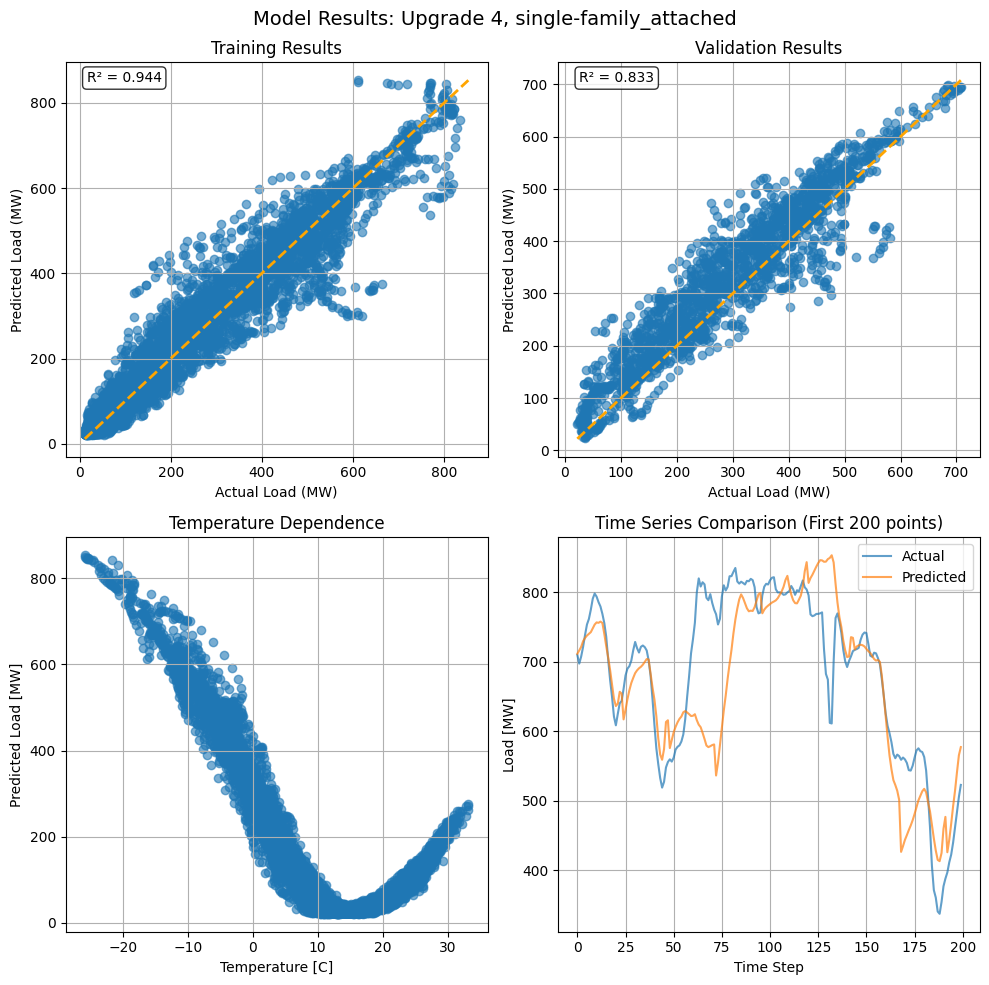


Progress: 9/20
Training model for upgrade 4, building_type multi-family_with_2_-_4_units (8753 samples)
Model trained - R2: 0.843, RMSE: 80.87 MW, Iterations: 73


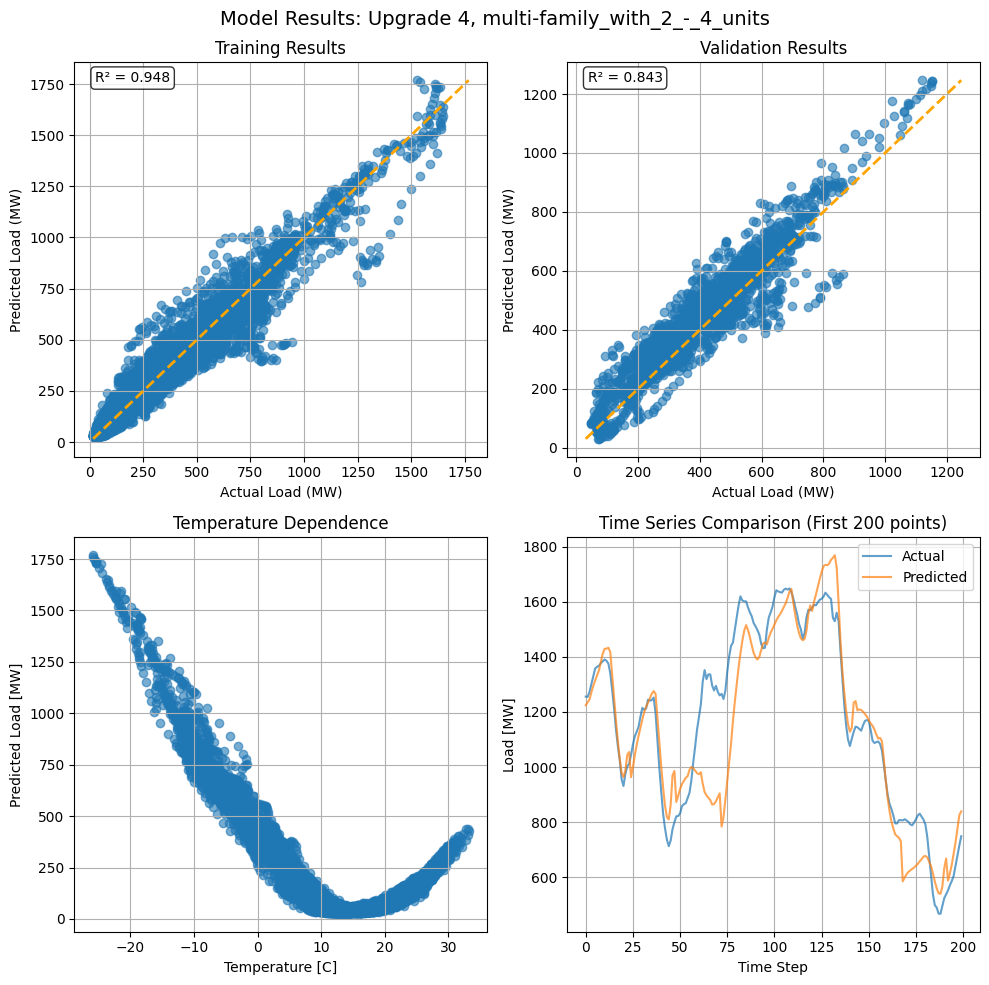


Progress: 10/20
Training model for upgrade 4, building_type multi-family_with_5plus_units (8753 samples)
Model trained - R2: 0.830, RMSE: 63.24 MW, Iterations: 190


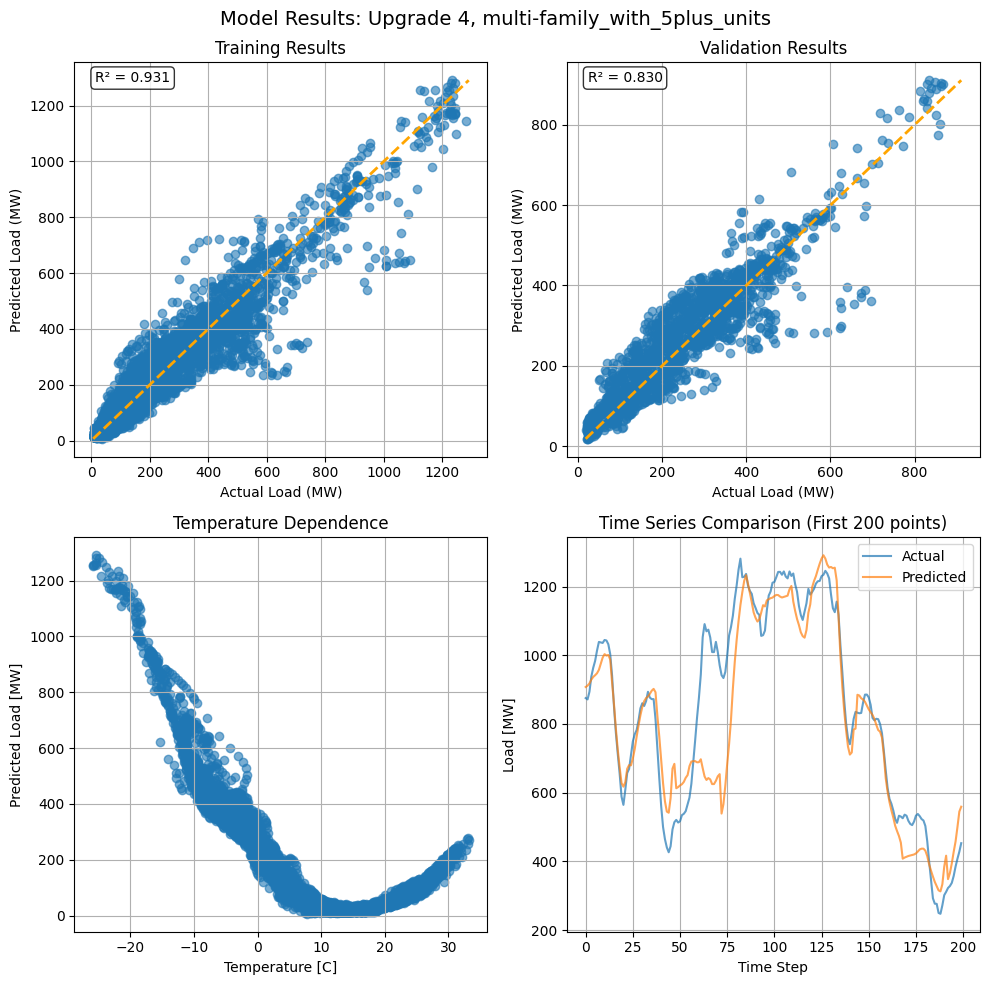


Progress: 11/20
Training model for upgrade 11, building_type mobile_home (8753 samples)
Model trained - R2: 0.879, RMSE: 43.80 MW, Iterations: 110


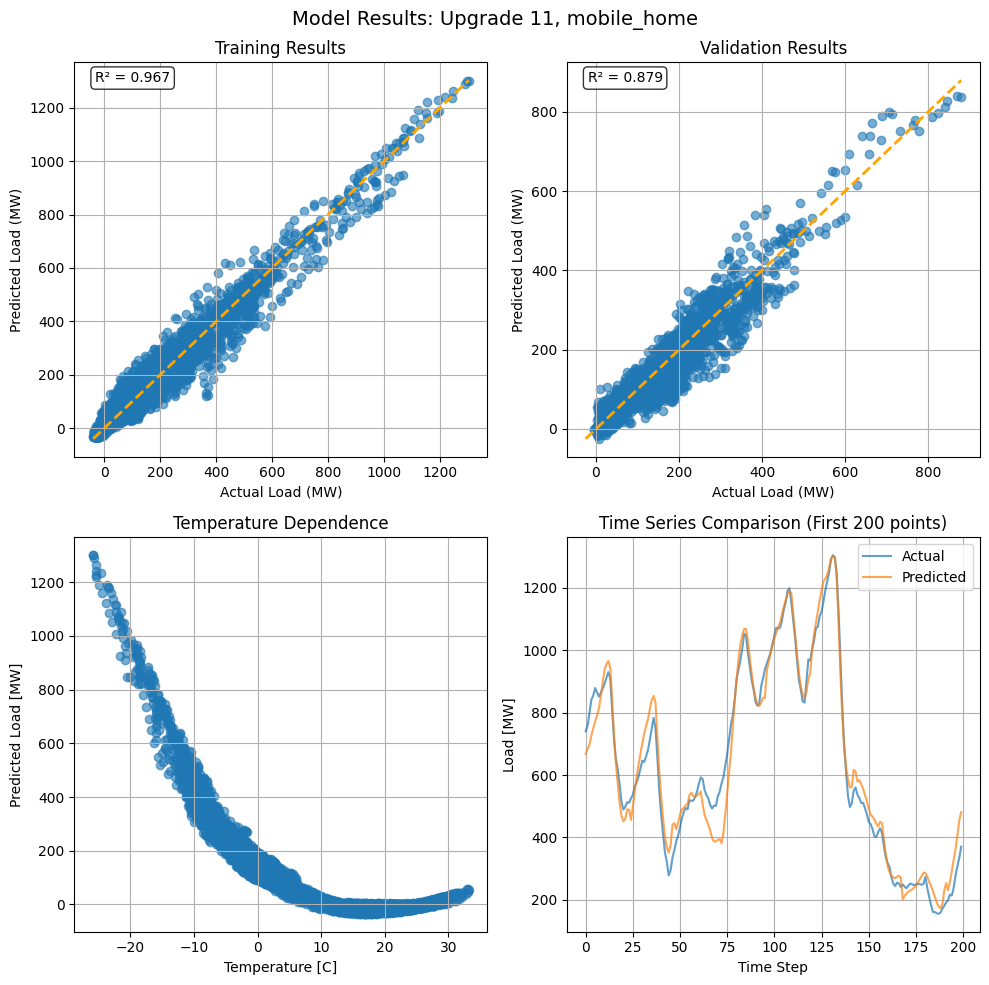


Progress: 12/20
Training model for upgrade 11, building_type single-family_detached (8753 samples)
Model trained - R2: 0.849, RMSE: 1596.84 MW, Iterations: 68


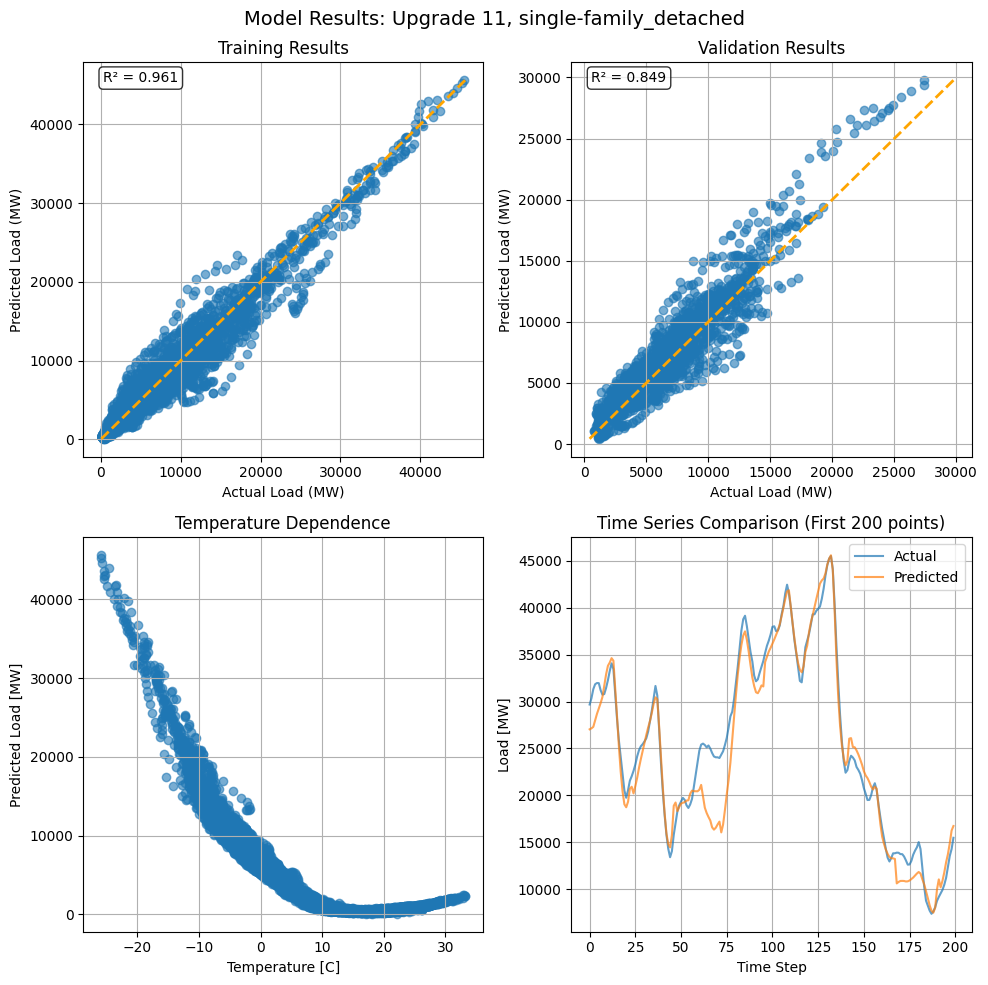


Progress: 13/20
Training model for upgrade 11, building_type single-family_attached (8753 samples)
Model trained - R2: 0.804, RMSE: 102.27 MW, Iterations: 90


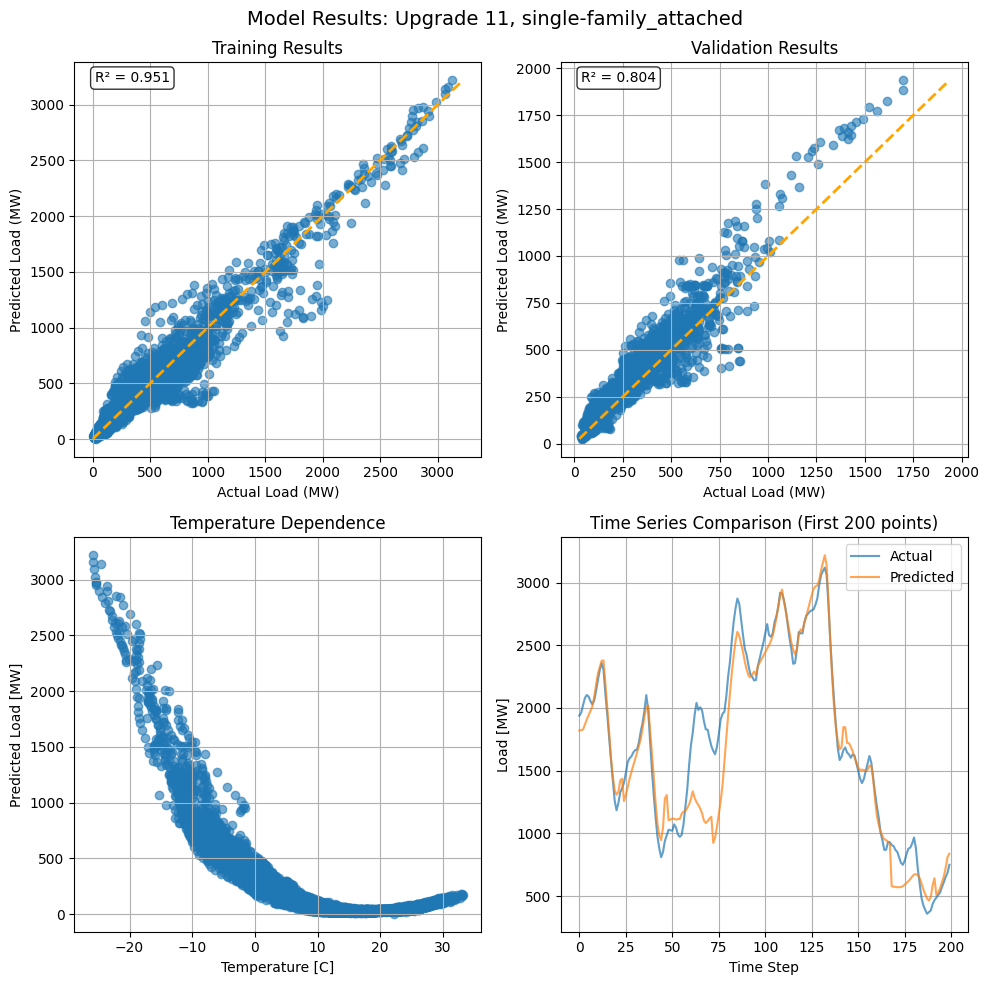


Progress: 14/20
Training model for upgrade 11, building_type multi-family_with_2_-_4_units (8753 samples)
Model trained - R2: 0.787, RMSE: 187.68 MW, Iterations: 90


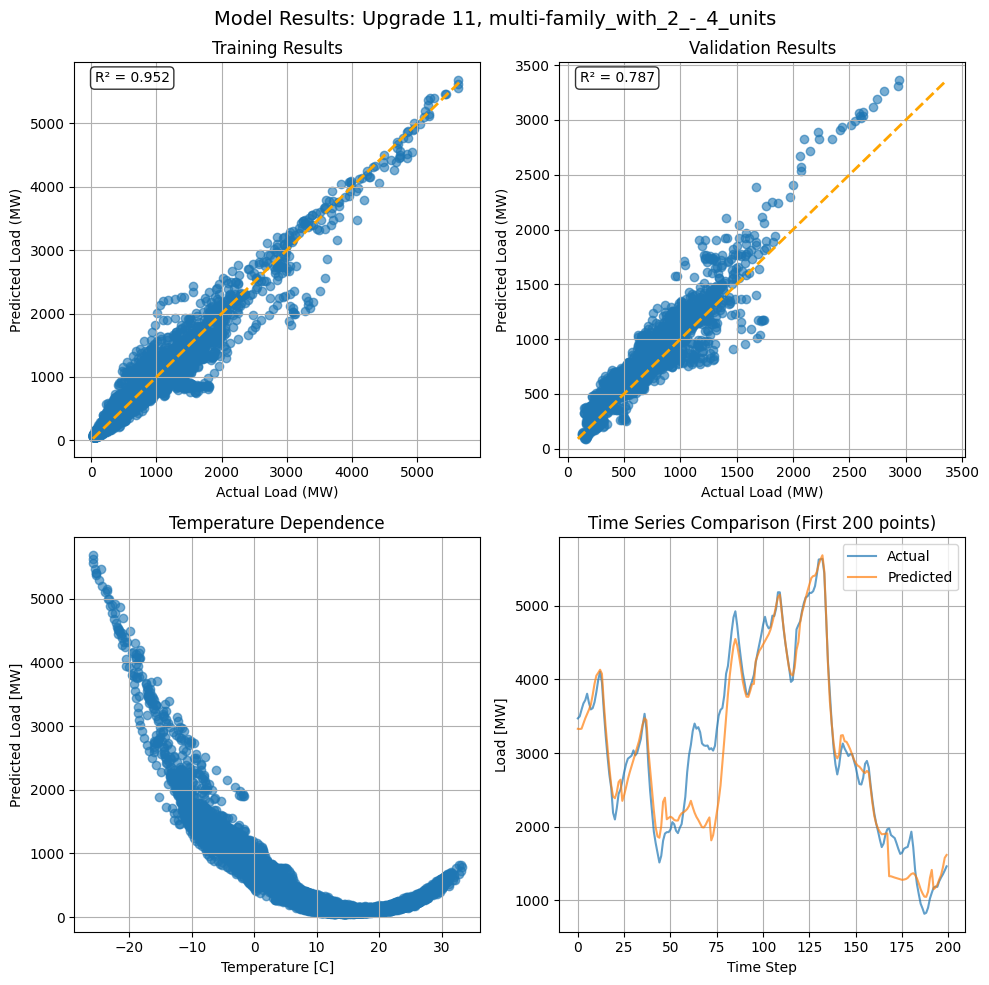


Progress: 15/20
Training model for upgrade 11, building_type multi-family_with_5plus_units (8753 samples)
Model trained - R2: 0.717, RMSE: 103.32 MW, Iterations: 117


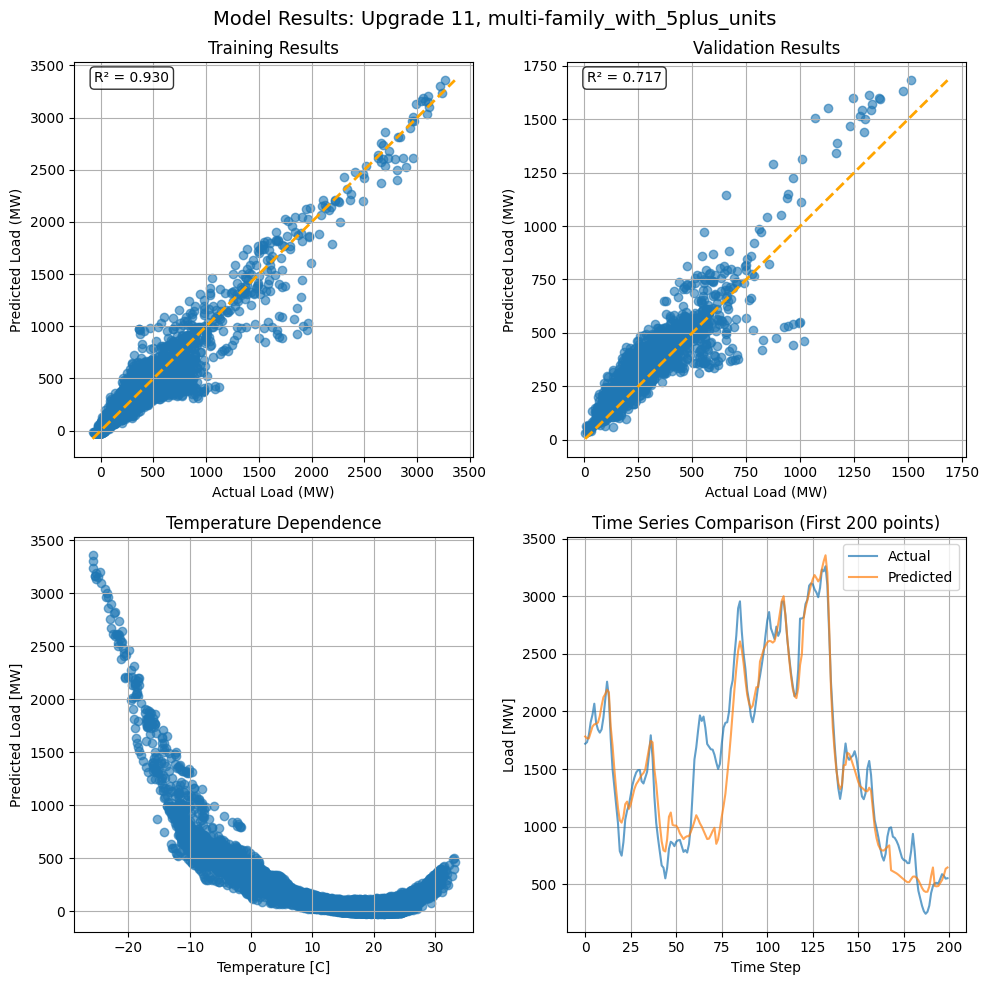


Progress: 16/20
Training model for upgrade 14, building_type mobile_home (8753 samples)
Model trained - R2: 0.780, RMSE: 16.08 MW, Iterations: 85


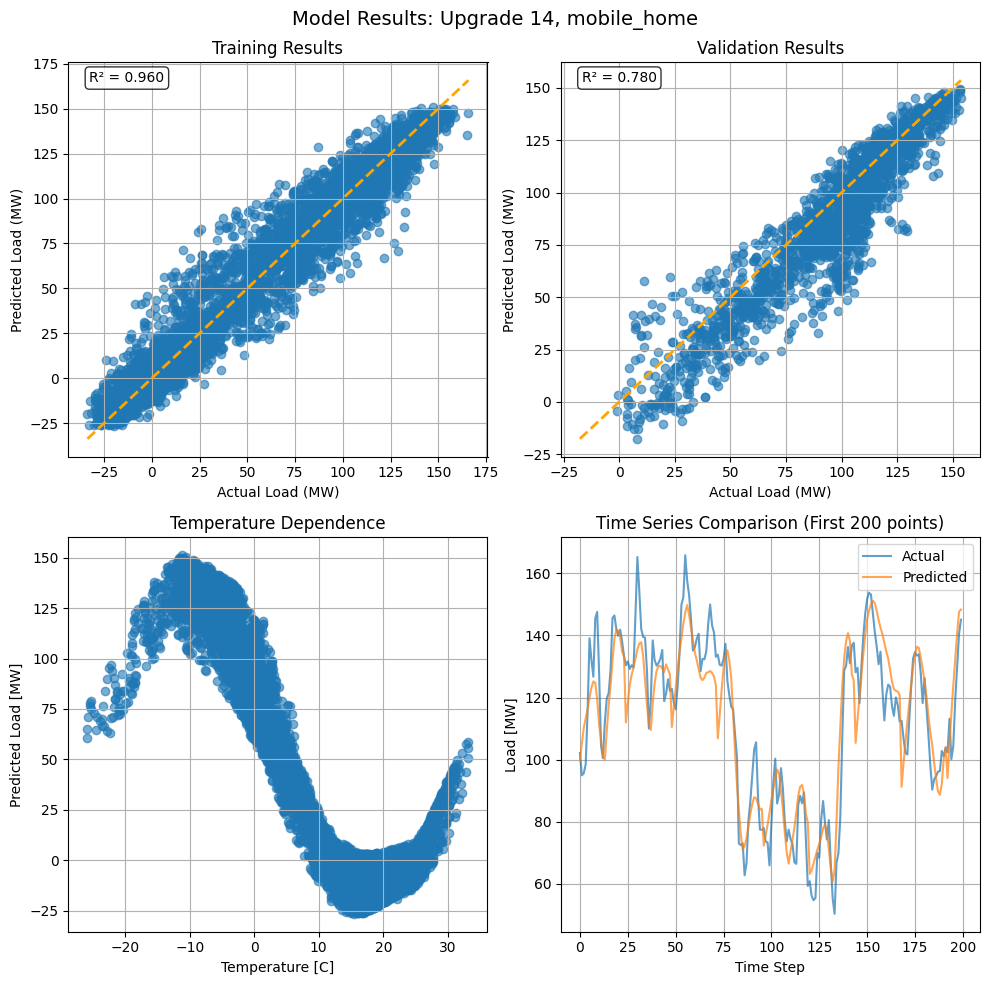


Progress: 17/20
Training model for upgrade 14, building_type single-family_detached (8753 samples)
Model trained - R2: 0.883, RMSE: 484.68 MW, Iterations: 64


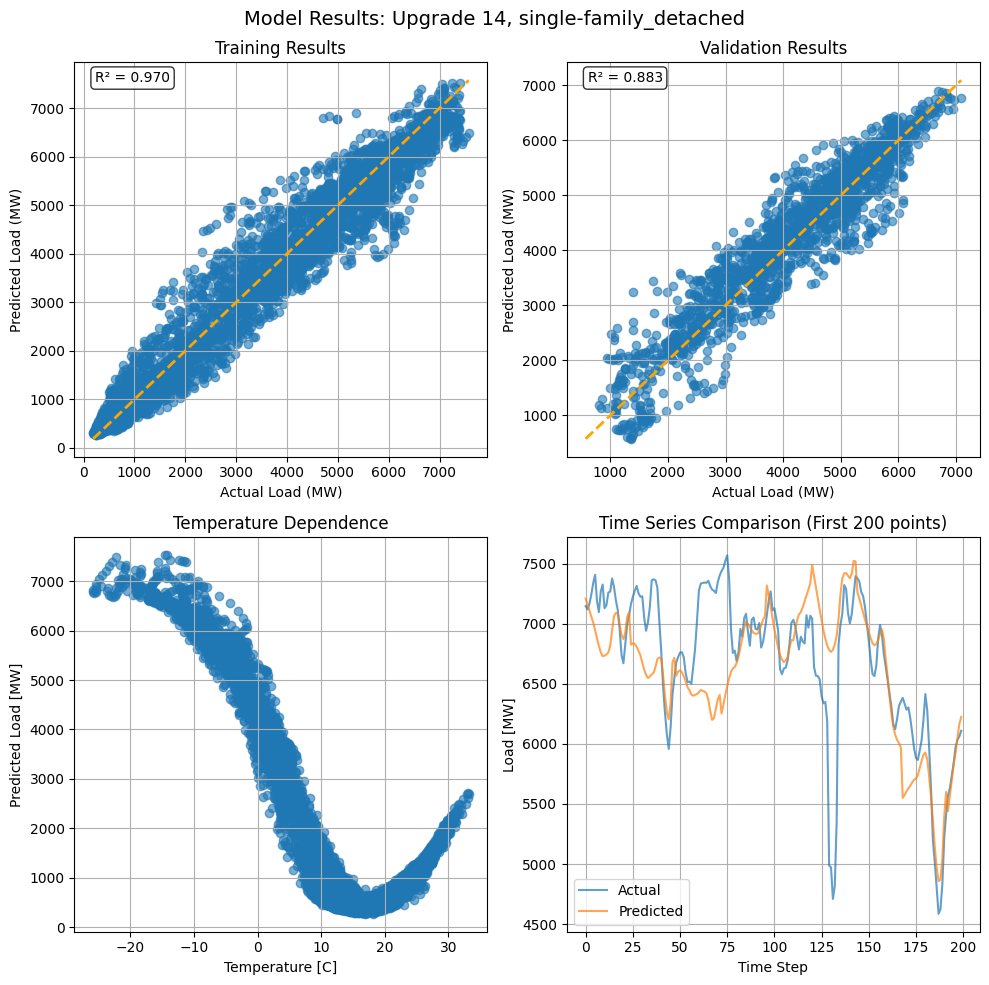


Progress: 18/20
Training model for upgrade 14, building_type single-family_attached (8753 samples)
Model trained - R2: 0.843, RMSE: 50.11 MW, Iterations: 56


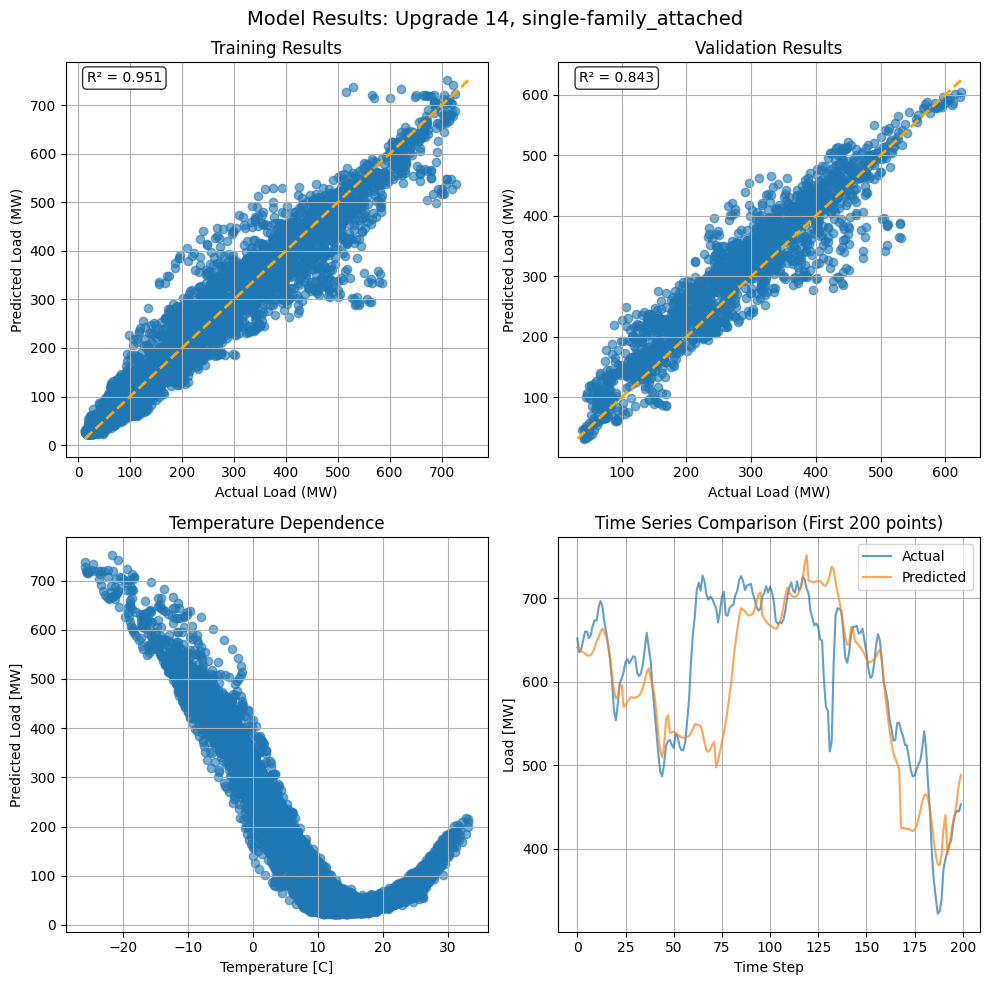


Progress: 19/20
Training model for upgrade 14, building_type multi-family_with_2_-_4_units (8753 samples)
Model trained - R2: 0.846, RMSE: 70.86 MW, Iterations: 82


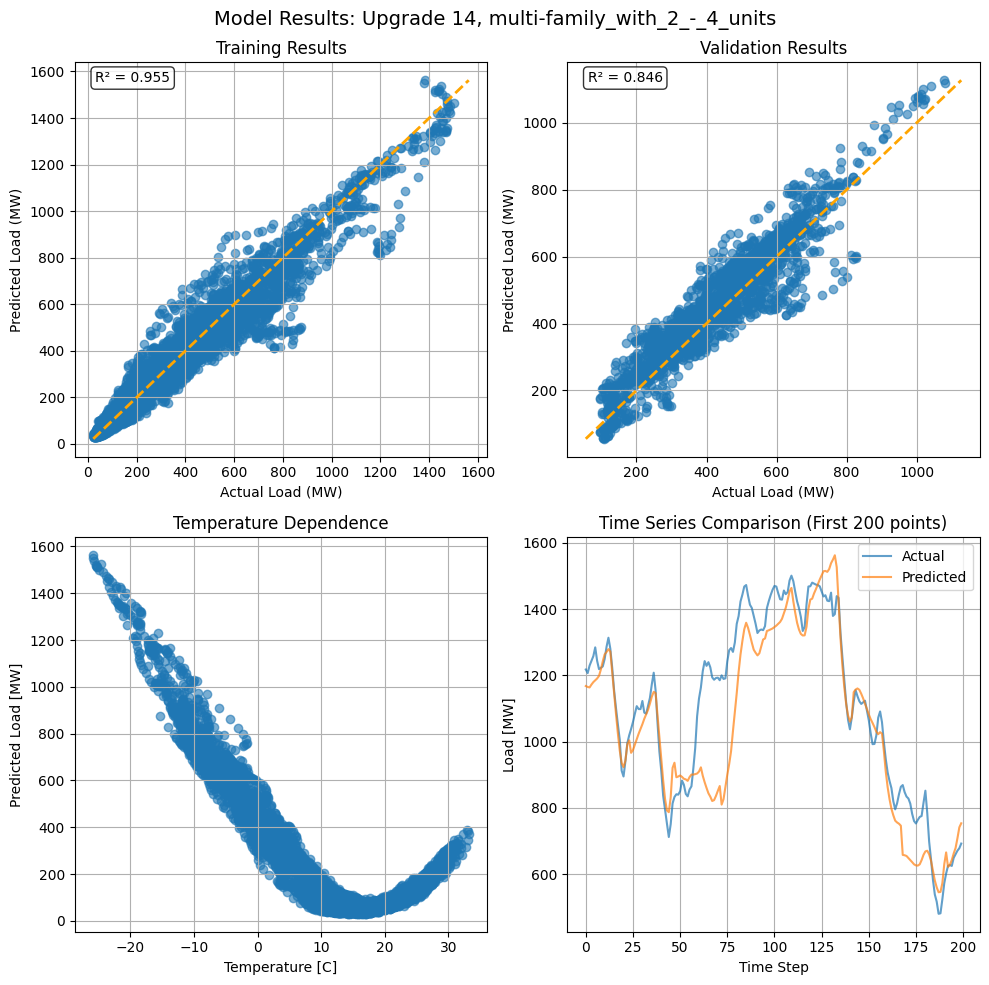


Progress: 20/20
Training model for upgrade 14, building_type multi-family_with_5plus_units (8753 samples)
Model trained - R2: 0.829, RMSE: 54.51 MW, Iterations: 167


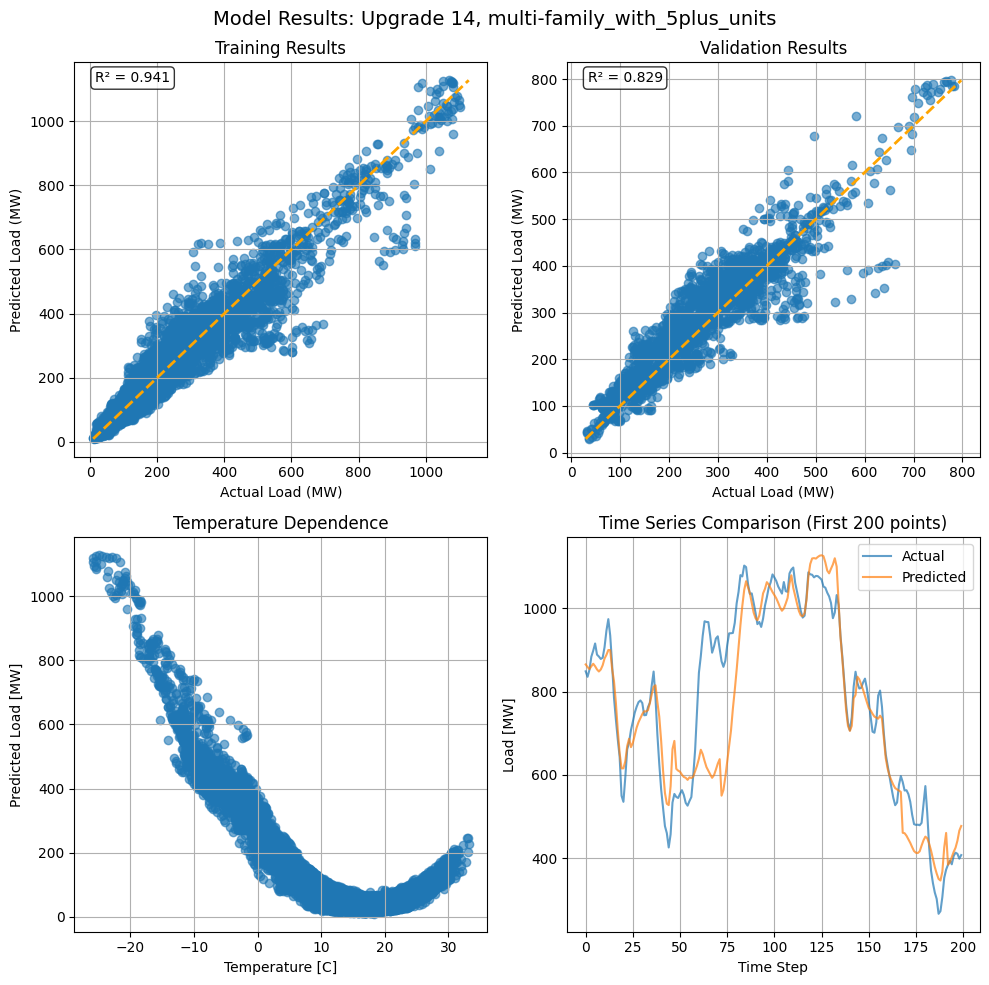


MODEL PERFORMANCE SUMMARY
 Upgrade                     Home Type  Samples  Train Size  Test Size    R²     RMSE      MAE   MAPE  Iterations  Converged
       1                   mobile_home     8753        6987       1747 0.892   43.239   32.587 19.246         106       True
       1 multi-family_with_2_-_4_units     8753        6987       1747 0.817  214.181  162.632 28.824          90       True
       1 multi-family_with_5plus_units     8753        6987       1747 0.809  131.805   88.622 46.092         195       True
       1        single-family_attached     8753        6987       1747 0.835  122.640   90.860 33.605          90       True
       1        single-family_detached     8753        6987       1747 0.871 1707.458 1289.846 23.866          93       True
       4                   mobile_home     8753        6987       1747 0.817   15.449   11.579 13.035          91       True
       4 multi-family_with_2_-_4_units     8753        6987       1747 0.843   80.866   64.393 21.

In [5]:
# Train
predictor = bem.train_load_prediction_models(
    stock_type = 'resstock',
    df = df,
    upgrades = upgrades,
    building_types = home_types,
    temperature_col = 'T2C',
    hidden_layer_sizes = (100, 100),
    plot_results = True,
    store_models = True
)

In [6]:
# Predict future loads
tgw_experiments = np.sort(os.listdir(tgw_path))

# Loop through all TGW experiments
for temp_save_name in tgw_experiments:
    # Climate path
    temp_file_path = f"{project_path}/data/climate/tgw/zonal_T2C_{temp_save_name}.csv"
    # Predict new
    predictor.predict_future_loads(temp_file_path = temp_file_path,
                                   temp_save_name = temp_save_name,
                                   upgrades = upgrades,
                                   building_types = home_types)

In [8]:
# Comparison plots
upgrade = 1
df_hist = pd.concat([pd.read_csv(f"{project_path}/data/load/resstock/simulated/state_wide/historical_1980_2019_{upgrade}_{home_type}.csv") for home_type in home_types])
df_rcp45 = pd.concat([pd.read_csv(f"{project_path}/data/load/resstock/simulated/state_wide/rcp45cooler_2020_2059_{upgrade}_{home_type}.csv") for home_type in home_types])
df_rcp85 = pd.concat([pd.read_csv(f"{project_path}/data/load/resstock/simulated/state_wide/rcp85hotter_2060_2099_{upgrade}_{home_type}.csv") for home_type in home_types])

# Read historical NYISO load
df_load = pd.read_csv(f"{project_path}/data/nyiso/historical_load/combined/historical_load.csv")
df_load["time"] = pd.to_datetime(df_load["time"])
df_load["time"] = df_load["time"].dt.tz_localize("America/New_York", ambiguous="NaT", nonexistent="NaT")
df_load["time"] = df_load["time"].dt.tz_convert("UTC")

In [12]:
# Get historical NYISO load
df_load = pd.read_csv(f"{project_path}/data/nyiso/historical_load/combined/historical_load.csv")
df_load["time"] = pd.to_datetime(df_load["time"])
df_load["time"] = df_load["time"].dt.tz_localize("America/New_York", ambiguous="NaT", nonexistent="NaT")
df_load["time"] = df_load["time"].dt.tz_convert("UTC")

df_load = df_load[df_load['load_MW'] > 0.]
df_load_nyiso = df_load.groupby('time')[['load_MW']].mean().reset_index()
df_load_nyiso['dayofyear'] = df_load_nyiso['time'].dt.dayofyear

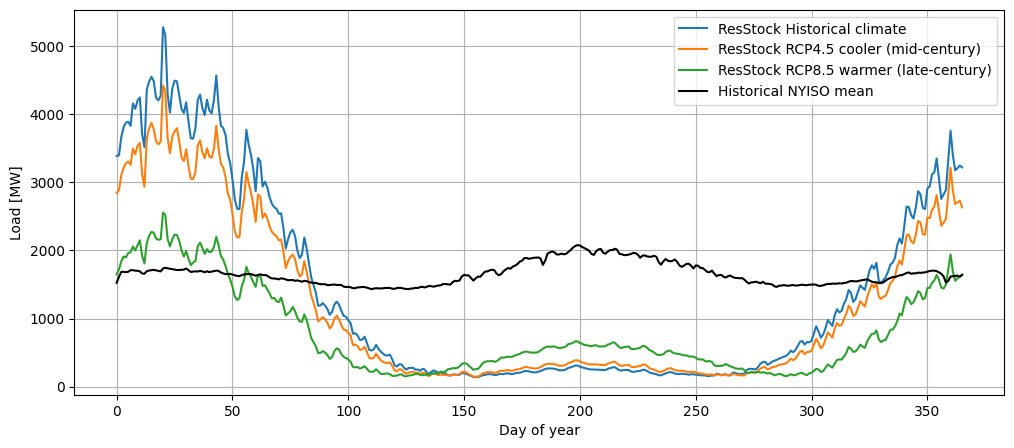

In [13]:
# Plot all
fig, ax = plt.subplots(figsize=(12,5))

# resstock_year = 2012
ax.plot(df_hist.groupby('day_of_year')['predicted_savings_MW'].mean().to_numpy(), label='ResStock Historical climate')
ax.plot(df_rcp45.groupby('day_of_year')['predicted_savings_MW'].mean().to_numpy(), label='ResStock RCP4.5 cooler (mid-century)')
ax.plot(df_rcp85.groupby('day_of_year')['predicted_savings_MW'].mean().to_numpy(), label='ResStock RCP8.5 warmer (late-century)')

ax.plot(df_load_nyiso.groupby('dayofyear').mean()['load_MW'].to_numpy(), color='black', label='Historical NYISO mean')

ax.legend()
ax.set_ylabel('Load [MW]')
ax.set_xlabel('Day of year')
ax.grid(0.5)
plt.show()

### Distribute to bus level

In [3]:
# Loop through all, assign to bus
tgw_experiments = np.sort(os.listdir(tgw_path))

stock_type = 'resstock'
upgrade = '1'

for home_type in home_types:
    for experiment in tgw_experiments:
        # Check if done
        save_path = f'{project_path}/data/load/{stock_type}/simulated/bus_level/{experiment}_{upgrade}_{home_type}.parquet'
        if os.path.exists(save_path):
            contine
        # Compute
        df = bem.assign_loads_to_bus(
            stock_type = stock_type,
            building_type = home_type,
            upgrade = upgrade,
            climate_scenario = experiment
        )
        df.to_parquet(save_path)